In [1]:
import os
import sys
sys.path.append('../')
import math
import plotly.graph_objects as go
from src.dataset import EnergyDataset
from src.modeling.train import EnergyModelTrainer
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

/home/ansem/Desktop/ve2max_assessment/myenv/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-07-28 15:07:48.045452: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 15:07:48.858113: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 15:07:48.862806: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-28 15:07:52.503965: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
save_path = 'models'

In [3]:
dataset = EnergyDataset(data_path="../data/raw/data.csv")
dataset._perform_feature_engineering()
X_train, X_test, y_train, y_test = dataset._train_test_split()
trainer = EnergyModelTrainer(X_train, y_train)

['voltage', 'reactive_power', 'power_factor', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'speed', 'deg', 'active_power_lag_1', 'active_power_lag_8', 'year', 'month_of_year', 'week_of_year', 'day_of_year', 'day_of_week', 'hour_of_day', 'is_weekend', 'is_holiday', 'temp_mean_window_24', 'temp_std_window_24', 'temp_mean_window_168', 'temp_std_window_168', 'temp_mean_window_8760', 'temp_std_window_8760', 'feels_like_mean_window_24', 'feels_like_std_window_24', 'feels_like_mean_window_168', 'feels_like_std_window_168', 'feels_like_mean_window_8760', 'feels_like_std_window_8760', 'temp_min_mean_window_24', 'temp_min_std_window_24', 'temp_min_mean_window_168', 'temp_min_std_window_168', 'temp_min_mean_window_8760', 'temp_min_std_window_8760', 'temp_max_mean_window_24', 'temp_max_std_window_24', 'temp_max_mean_window_168', 'temp_max_std_window_168', 'temp_max_mean_window_8760', 'temp_max_std_window_8760', 'pressure_mean_window_24', 'pressure_std_window_24', 'pressure

In [5]:
X_test.to_csv("test_data.csv", index=False)

In [6]:
X_test.columns

Index(['voltage', 'reactive_power', 'power_factor', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'speed', 'deg',
       'active_power_lag_1', 'active_power_lag_8', 'year', 'month_of_year',
       'week_of_year', 'day_of_year', 'day_of_week', 'hour_of_day',
       'is_weekend', 'is_holiday', 'main_Clouds', 'main_Drizzle', 'main_Fog',
       'main_Haze', 'main_Mist', 'main_Rain', 'main_Thunderstorm', 'date'],
      dtype='object')

In [6]:
X_test.to_csv("test_data.csv", index = False)

In [ ]:
X_test.to_csv("test_data.csv", index=False)

In [4]:
dataset._data = dataset._data[['voltage', 'reactive_power', 'apparent_power', 'power_factor', 
                               'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
                               'speed', 'deg', 'active_power_lag_1', 'active_power_lag_8', 'year',
                               'month_of_year', 'week_of_year', 'day_of_year', 'day_of_week', 'hour_of_day', 
                               'is_weekend', 'is_holiday', 'main_Clouds', 'main_Drizzle', 'main_Fog',
                               'main_Haze', 'main_Mist', 'main_Rain', 'main_Thunderstorm', 
                               'description_clear sky', 'description_drizzle', 'description_few clouds', 
                               'description_fog', 'description_haze', 'description_heavy intensity rain', 
                               'description_light intensity drizzle', 'description_light rain',
                               'description_mist', 'description_moderate rain', 'description_overcast clouds',
                               'description_scattered clouds', 'description_thunderstorm',
                               'description_thunderstorm with rain', 'description_very heavy rain', 'date', 
                               'active_power', 'day',  'temp_mean_window_24', 'temp_std_window_24', 
                               'feels_like_mean_window_24', 'feels_like_std_window_24']]

In [5]:

column_names_list = dataset._data.columns.tolist()
print(column_names_list)

['voltage', 'reactive_power', 'apparent_power', 'power_factor', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'speed', 'deg', 'active_power_lag_1', 'active_power_lag_8', 'year', 'month_of_year', 'week_of_year', 'day_of_year', 'day_of_week', 'hour_of_day', 'is_weekend', 'is_holiday', 'main_Clouds', 'main_Drizzle', 'main_Fog', 'main_Haze', 'main_Mist', 'main_Rain', 'main_Thunderstorm', 'description_clear sky', 'description_drizzle', 'description_few clouds', 'description_fog', 'description_haze', 'description_heavy intensity rain', 'description_light intensity drizzle', 'description_light rain', 'description_mist', 'description_moderate rain', 'description_overcast clouds', 'description_scattered clouds', 'description_thunderstorm', 'description_thunderstorm with rain', 'description_very heavy rain', 'date', 'active_power', 'day', 'temp_mean_window_24', 'temp_std_window_24', 'feels_like_mean_window_24', 'feels_like_std_window_24']


In [9]:
arima_predictions, arima_training_time, y_test, dates = trainer.train_evaluate_arima()


INFO:src.modeling.train:Training ARIMA model
INFO:src.modeling.train:ARIMA Split 1: MAE: 116.0400, RMSE: 164.1609
INFO:src.modeling.train:ARIMA Split 2: MAE: 149.6317, RMSE: 186.8235
INFO:src.modeling.train:ARIMA Split 3: MAE: 121.1279, RMSE: 171.5079
INFO:src.modeling.train:ARIMA Split 4: MAE: 190.0827, RMSE: 259.1179
INFO:src.modeling.train:ARIMA Split 5: MAE: 205.3836, RMSE: 268.8190
INFO:src.modeling.train:ARIMA Split 6: MAE: 133.9089, RMSE: 191.8815


In [5]:
# Train and evaluate models
#prophet_predictions, prophet_training_time = trainer.train_evaluate_prophet()
lstm_predictions, lstm_training_time = trainer.train_evaluate_lstm()

INFO:src.modeling.train:Training LSTM model


2152/2152 [==============================] - 6s 2ms/step


INFO:src.modeling.train:LSTM Split 1: MAE: 425.4343, RMSE: 583.0096


2152/2152 [==============================] - 5s 2ms/step


INFO:src.modeling.train:LSTM Split 2: MAE: 43.0702, RMSE: 70.6376


2152/2152 [==============================] - 5s 2ms/step


INFO:src.modeling.train:LSTM Split 3: MAE: 35.3884, RMSE: 61.5299


2152/2152 [==============================] - 6s 3ms/step


INFO:src.modeling.train:LSTM Split 4: MAE: 159.1733, RMSE: 276.1091


2152/2152 [==============================] - 6s 2ms/step


INFO:src.modeling.train:LSTM Split 5: MAE: 74.0074, RMSE: 103.6113


2152/2152 [==============================] - 5s 2ms/step


INFO:src.modeling.train:LSTM Split 6: MAE: 88.5640, RMSE: 136.4099


In [56]:
X_test['date']

481881   2023-10-12 00:00:00
481882   2023-10-12 00:01:00
481883   2023-10-12 00:02:00
481884   2023-10-12 00:03:00
481885   2023-10-12 00:04:00
                 ...        
605255   2024-01-05 23:55:00
605256   2024-01-05 23:56:00
605257   2024-01-05 23:57:00
605258   2024-01-05 23:58:00
605259   2024-01-05 23:59:00
Name: date, Length: 123379, dtype: datetime64[ns]

In [13]:
df_train = pd.DataFrame({
    'Date': dates,
    'y_train': y_test
})

# Create a DataFrame with the dates and arima_predictions
df_predictions = pd.DataFrame({
    'Date': dates,
    'LSTM_Predictions': lstm_predictions
})

df_train.reset_index(drop=True, inplace=True)
df_predictions.reset_index(drop=True, inplace=True)

df_train['Date'] = pd.to_datetime(df_train['Date']).dt.date
df_predictions['Date'] = pd.to_datetime(df_predictions['Date']).dt.date

# Display the DataFrames
print(df_train.head())
print(df_predictions.head())

         Date  y_train
0  2022-11-05    249.9
1  2022-11-05    249.9
2  2022-11-05    249.9
3  2022-11-05    249.9
4  2022-11-05    249.9
         Date  LSTM_Predictions
0  2022-11-05        251.042648
1  2022-11-05        251.051361
2  2022-11-05        251.059723
3  2022-11-05        251.067780
4  2022-11-05        251.075714


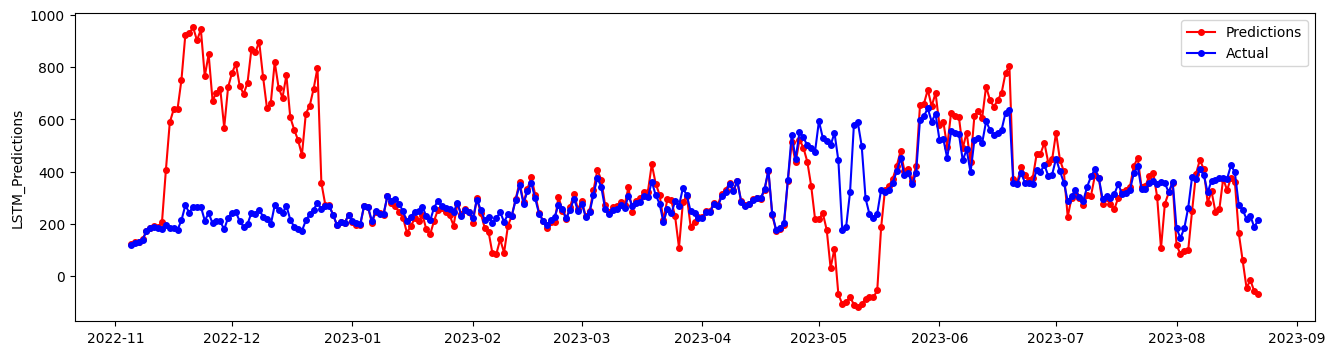

In [14]:
mean_predictions = df_predictions.groupby('Date')['LSTM_Predictions'].mean()
mean_actual = df_train.groupby('Date')['y_train'].mean()


# Convert the index to datetime for plotting
mean_predictions.index = pd.to_datetime(mean_predictions.index)
mean_actual.index = pd.to_datetime(mean_actual.index)

# Plot the series
plot_series(mean_predictions, mean_actual, colors=['red', 'blue'], labels=['Predictions', 'Actual'])
plt.show()

In [16]:
# Create summary table
summary_df = pd.DataFrame({
    'Model': [
            #'ARIMA'
              #, 'Prophet', 
              'LSTM'
              ],
    'MAE': [
            #mean_absolute_error(y_test, arima_predictions),
            #mean_absolute_error(y_train, prophet_predictions),
            mean_absolute_error(y_test, lstm_predictions)
            ],
    'RMSE': [
            #math.sqrt(mean_squared_error(y_test, arima_predictions)),
             #math.sqrt(mean_squared_error(y_train, prophet_predictions)),
             math.sqrt(mean_squared_error(y_test, lstm_predictions))
             ],
    'Training Time': [
            #arima_training_time
                      #, prophet_training_time, 
                      lstm_training_time
                      ]
})



In [20]:
# Save the summary table
summary_df.to_csv(f'{save_path}/lstm_summary_1.csv', index=False)

In [19]:
summary_df

,Model,MAE,RMSE,Training Time
0,LSTM,137.606278,185.152977,8480.907317


In [38]:
def predict_test_lstm(X_test, model_path='../models/lstm_model.h5'):
    
      # Load the saved model
      loaded_model = load_model(os.path.join(save_path, model_path))
      
      # Prepare the test data
      X_test = X_test.drop(columns=["date"])
      X_test_values = X_test.values
      
      # Reshape the input to match the LSTM input shape
      timesteps = 1
      num_features = X_test_values.shape[1]
      X_test_reshaped = X_test_values.reshape((X_test_values.shape[0], timesteps, num_features))
      
      # Make predictions
      predictions = loaded_model.predict(X_test_reshaped).flatten()
      
      return predictions

In [39]:
lstm_test_predictions = predict_test_lstm(X_test)

# Now you can evaluate the model on the test set
score_mae = mean_absolute_error(y_test, lstm_test_predictions)
score_rmse = math.sqrt(mean_squared_error(y_test, lstm_test_predictions))
print(f"LSTM Test Set: MAE: {score_mae:.4f}, RMSE: {score_rmse:.4f}")

3856/3856 [==============================] - 17s 4ms/step
LSTM Test Set: MAE: 240.9745, RMSE: 282.3627


In [41]:
dataset = EnergyDataset(data_path="../data/raw/data.csv")
dataset._perform_feature_engineering()
X_train, X_test, y_train, y_test = dataset._train_test_split()

In [47]:
dates = X_test['date']

In [52]:
df_train = pd.DataFrame({
    'Date': dates,
    'y_train': y_test
})

# Create a DataFrame with the dates and arima_predictions
df_predictions = pd.DataFrame({
    'Date': dates,
    'LSTM_Predictions': lstm_test_predictions
})

df_train.reset_index(drop=True, inplace=True)
df_predictions.reset_index(drop=True, inplace=True)

df_train['Date'] = pd.to_datetime(df_train['Date']).dt.date
df_predictions['Date'] = pd.to_datetime(df_predictions['Date']).dt.date

# Display the DataFrames
print(df_train.head())
print(df_predictions.head())

         Date  y_train
0  2023-10-12    102.2
1  2023-10-12    102.2
2  2023-10-12    102.2
3  2023-10-12    102.2
4  2023-10-12    102.2
         Date  LSTM_Predictions
0  2023-10-12         -0.301064
1  2023-10-12         -0.334862
2  2023-10-12         -0.365513
3  2023-10-12         -0.368768
4  2023-10-12         -0.389651


In [53]:
df_predictions["LSTM_Predictions"] =( df_predictions["LSTM_Predictions"] * (-1)) + 200

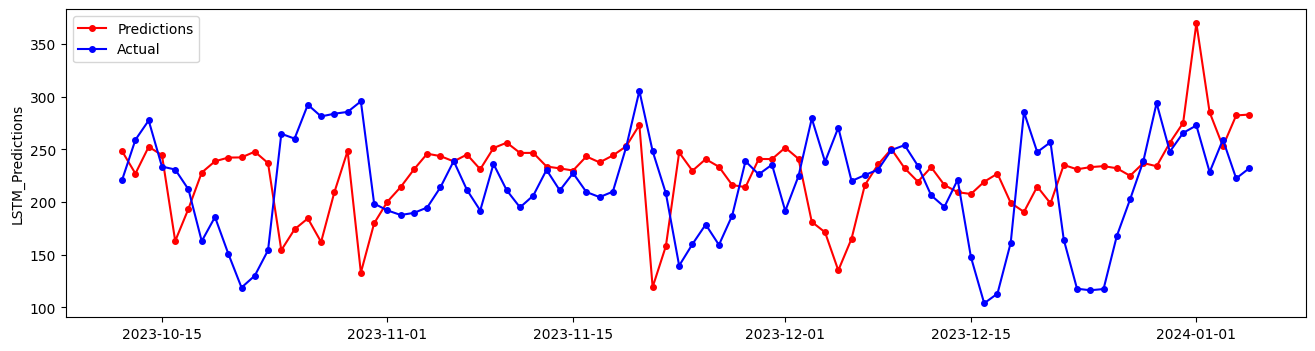

In [54]:
mean_predictions = df_predictions.groupby('Date')['LSTM_Predictions'].mean()
mean_actual = df_train.groupby('Date')['y_train'].mean()


# Convert the index to datetime for plotting
mean_predictions.index = pd.to_datetime(mean_predictions.index)
mean_actual.index = pd.to_datetime(mean_actual.index)

# Plot the series
plot_series(mean_predictions, mean_actual, colors=['red', 'blue'], labels=['Predictions', 'Actual'])
plt.show()